In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("fivethirtyeight")
%matplotlib inline

!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('WHO-COVID-19-global-table-data.csv')
df.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,614385693,7882.256871,2886142,37.027738,325602,6522600,83.68165,8855,0.113605,1668
1,United States of America,Americas,94965623,28690.291000,346532,104.692000,79340,1047392,316.43000,3081,0.931000,1220
2,India,South-East Asia,44587307,3230.954000,28882,2.093000,3947,528629,38.30600,180,0.013000,18
3,Brazil,Americas,34654190,16303.296000,46243,21.755000,7613,685927,322.69900,323,0.152000,46
4,France,Europe,34304599,52744.368000,290601,446.808000,51348,151503,232.94000,212,0.326000,33


In [ ]:
df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

In [ ]:
df = df.dropna()

In [ ]:
df['Name'].unique()

array(['United States of America', 'India', 'Brazil', 'France', 'Germany',
       'Republic of Korea', 'The United Kingdom', 'Italy', 'Japan',
       'Russian Federation', 'Türkiye', 'Spain', 'Viet Nam', 'Australia',
       'Argentina', 'Netherlands', 'China', 'Iran (Islamic Republic of)',
       'Mexico', 'Indonesia', 'Colombia', 'Poland', 'Portugal', 'Ukraine',
       'Austria', 'Greece', 'Malaysia', 'Thailand', 'Chile', 'Belgium',
       'Canada', 'Peru', 'Czechia', 'Switzerland', 'South Africa',
       'Philippines', 'Denmark', 'Romania', 'Sweden', 'Iraq', 'Serbia',
       'Hungary', 'Bangladesh', 'Singapore', 'Slovakia', 'Georgia',
       'New Zealand', 'Jordan', 'Ireland', 'Pakistan', 'Kazakhstan',
       'Norway', 'Finland', 'Morocco', 'Bulgaria', 'Lithuania', 'Croatia',
       'Lebanon', 'Slovenia', 'Tunisia', 'Guatemala', 'Costa Rica',
       'Cuba', 'Bolivia (Plurinational State of)', 'United Arab Emirates',
       'Ecuador', 'Nepal', 'Belarus', 'Panama', 'Uruguay', 'Mongolia

In [ ]:
total_cases = df.groupby(["Name"]).sum()
total_cases

<ipython-input-6-797277a3edc5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_cases = df.groupby(["Name"]).sum()


,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Name,,,,,,,,,,
Afghanistan,198876,510.877,853,2.191,0,7799,20.034,3,0.008,0
Albania,331027,11502.780,312,10.842,44,3589,124.713,0,0.000,0
Algeria,270668,617.244,37,0.084,0,6879,15.687,0,0.000,0
American Samoa,8247,14941.029,0,0.000,0,34,61.598,0,0.000,0
Andorra,46227,59829.159,80,103.540,0,155,200.608,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,761,6766.850,0,0.000,0,7,62.244,0,0.000,0
Yemen,11935,40.015,1,0.003,0,2157,7.232,0,0.000,0
Zambia,333503,1814.098,116,0.631,0,4017,21.851,0,0.000,0


In [ ]:
# View the total number of cases 
total_cases_grouped = df.query("Name in ('United States of America', 'Brazil', 'France', 'Germany', 'Italy', 'Hong Kong', 'India', 'Bangladesh', 'The United Kingdom')").groupby(["Name"]).sum()
total_cases_grouped

<ipython-input-7-41c3d4852461>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_cases_grouped = df.query("Name in ('United States of America', 'Brazil', 'France', 'Germany', 'Italy', 'Hong Kong', 'India', 'Bangladesh', 'The United Kingdom')").groupby(["Name"]).sum()


,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Name,,,,,,,,,,
Bangladesh,2025197,1229.707,4429,2.689,708,29363,17.829,16,0.010,1
Brazil,34654190,16303.296,46243,21.755,7613,685927,322.699,323,0.152,46
France,34304599,52744.368,290601,446.808,51348,151503,232.940,212,0.326,33
Germany,33312373,40054.936,388140,466.701,51364,149948,180.298,87,0.105,14
India,44587307,3230.954,28882,2.093,3947,528629,38.306,180,0.013,18
Italy,22432803,37612.749,191434,320.975,37521,177054,296.864,279,0.468,30
The United Kingdom,23672855,34871.481,45028,66.329,4869,190317,280.348,181,0.267,0
United States of America,94965623,28690.291,346532,104.692,79340,1047392,316.430,3081,0.931,1220


# Question 1

**Question: How does the number of newly reported COVID-19 cases in the last 24 hours compare to the number of newly reported deaths in the same period for different countries?**

In [ ]:
# Extract the columns for newly reported cases and deaths in the last 24 hours
total_cases_grouped_24_hours = total_cases_grouped[['Cases - newly reported in last 24 hours', 'Deaths - newly reported in last 24 hours']].reset_index()
total_cases_grouped_24_hours

,Name,Cases - newly reported in last 24 hours,Deaths - newly reported in last 24 hours
0,Bangladesh,708,1
1,Brazil,7613,46
2,France,51348,33
3,Germany,51364,14
4,India,3947,18
5,Italy,37521,30
6,The United Kingdom,4869,0
7,United States of America,79340,1220


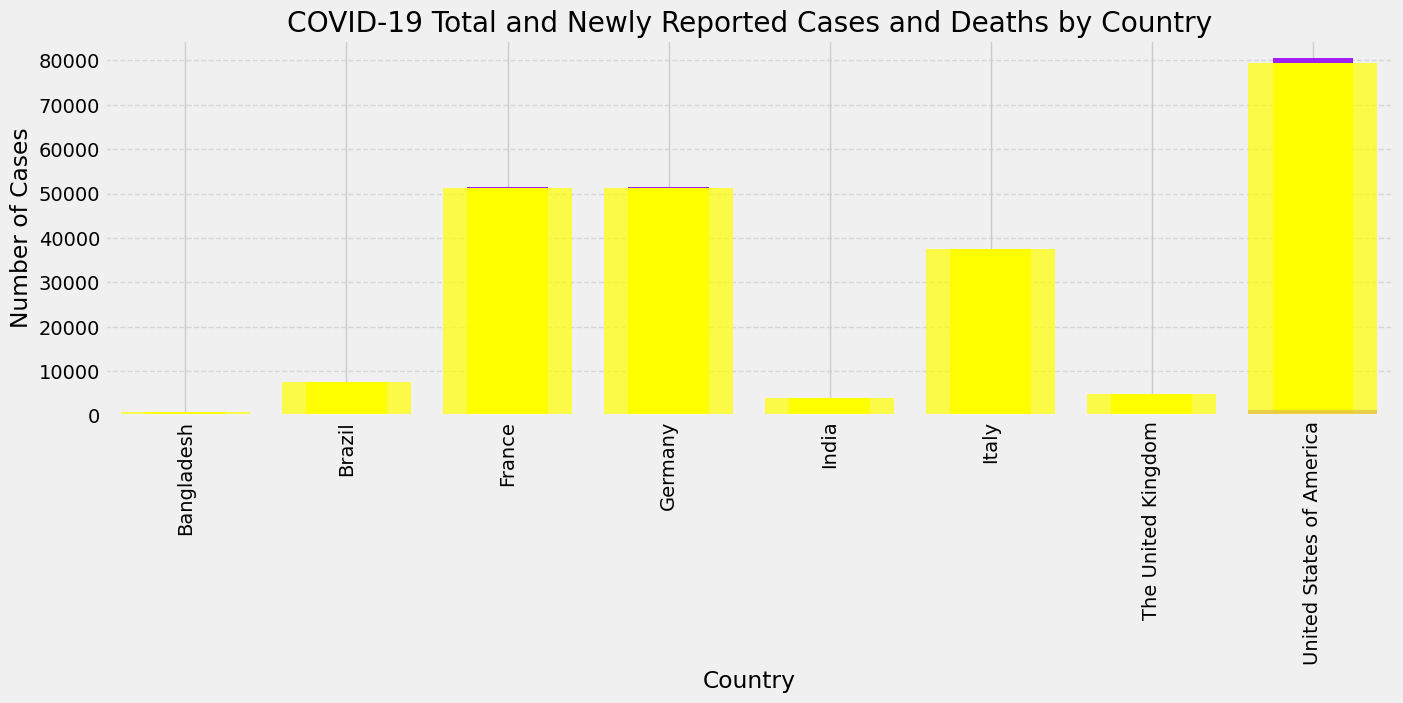

In [ ]:
# # Set the index to country name
# total_cases_grouped.set_index(total_cases_grouped.index, inplace=True)

# Set the width of the bars
bar_width = 0.5

# Define a list of color codes for the bars
colors = ['#FFFF00', '#A020F0']

# Create a stacked bar chart of the newly reported cases and deaths in the last 24 hours for each country
ax = total_cases_grouped_24_hours.plot(kind='bar', x='Name', stacked=True, width=bar_width, color=colors, figsize=(15, 8))


# Add the newly reported cases and deaths in the last 24 hours to the chart
ax.bar(total_cases_grouped.index, total_cases_grouped_24_hours['Deaths - newly reported in last 24 hours'], color='#A020F0', label='New Deaths', alpha=0.7)
ax.bar(total_cases_grouped.index, total_cases_grouped_24_hours['Cases - newly reported in last 24 hours'], color='#FFFF00', label='New Cases', alpha=0.7)

# Set the chart title and axis labels
ax.set_title('COVID-19 Total and Newly Reported Cases and Deaths by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Cases')

# Add legend, grid lines, and adjust padding
ax.legend()
ax.get_legend().set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=3)

# Show the chart
plt.show()


In [ ]:
total_cases_grouped_pop_new = total_cases_grouped.reset_index()[["Name", "Cases - newly reported in last 7 days per 100000 population", "Deaths - newly reported in last 7 days per 100000 population"]]
total_cases_grouped_pop_new 

,Name,Cases - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 7 days per 100000 population
0,Bangladesh,2.689,0.010
1,Brazil,21.755,0.152
2,France,446.808,0.326
3,Germany,466.701,0.105
4,India,2.093,0.013
5,Italy,320.975,0.468
6,The United Kingdom,66.329,0.267
7,United States of America,104.692,0.931


In [ ]:
total_cases_pop_new = total_cases.reset_index()[["Name", "Cases - newly reported in last 7 days per 100000 population", "Deaths - newly reported in last 7 days per 100000 population"]]
total_cases_pop_new 

,Name,Cases - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 7 days per 100000 population
0,Afghanistan,2.191,0.008
1,Albania,10.842,0.000
2,Algeria,0.084,0.000
3,American Samoa,0.000,0.000
4,Andorra,103.540,0.000
...,...,...,...
230,Wallis and Futuna,0.000,0.000
231,Yemen,0.003,0.000
232,Zambia,0.631,0.000
233,Zimbabwe,0.357,0.000


# Question 2

**Question: 
What is the distribution of cumulative COVID-19 cases across different WHO regions?**

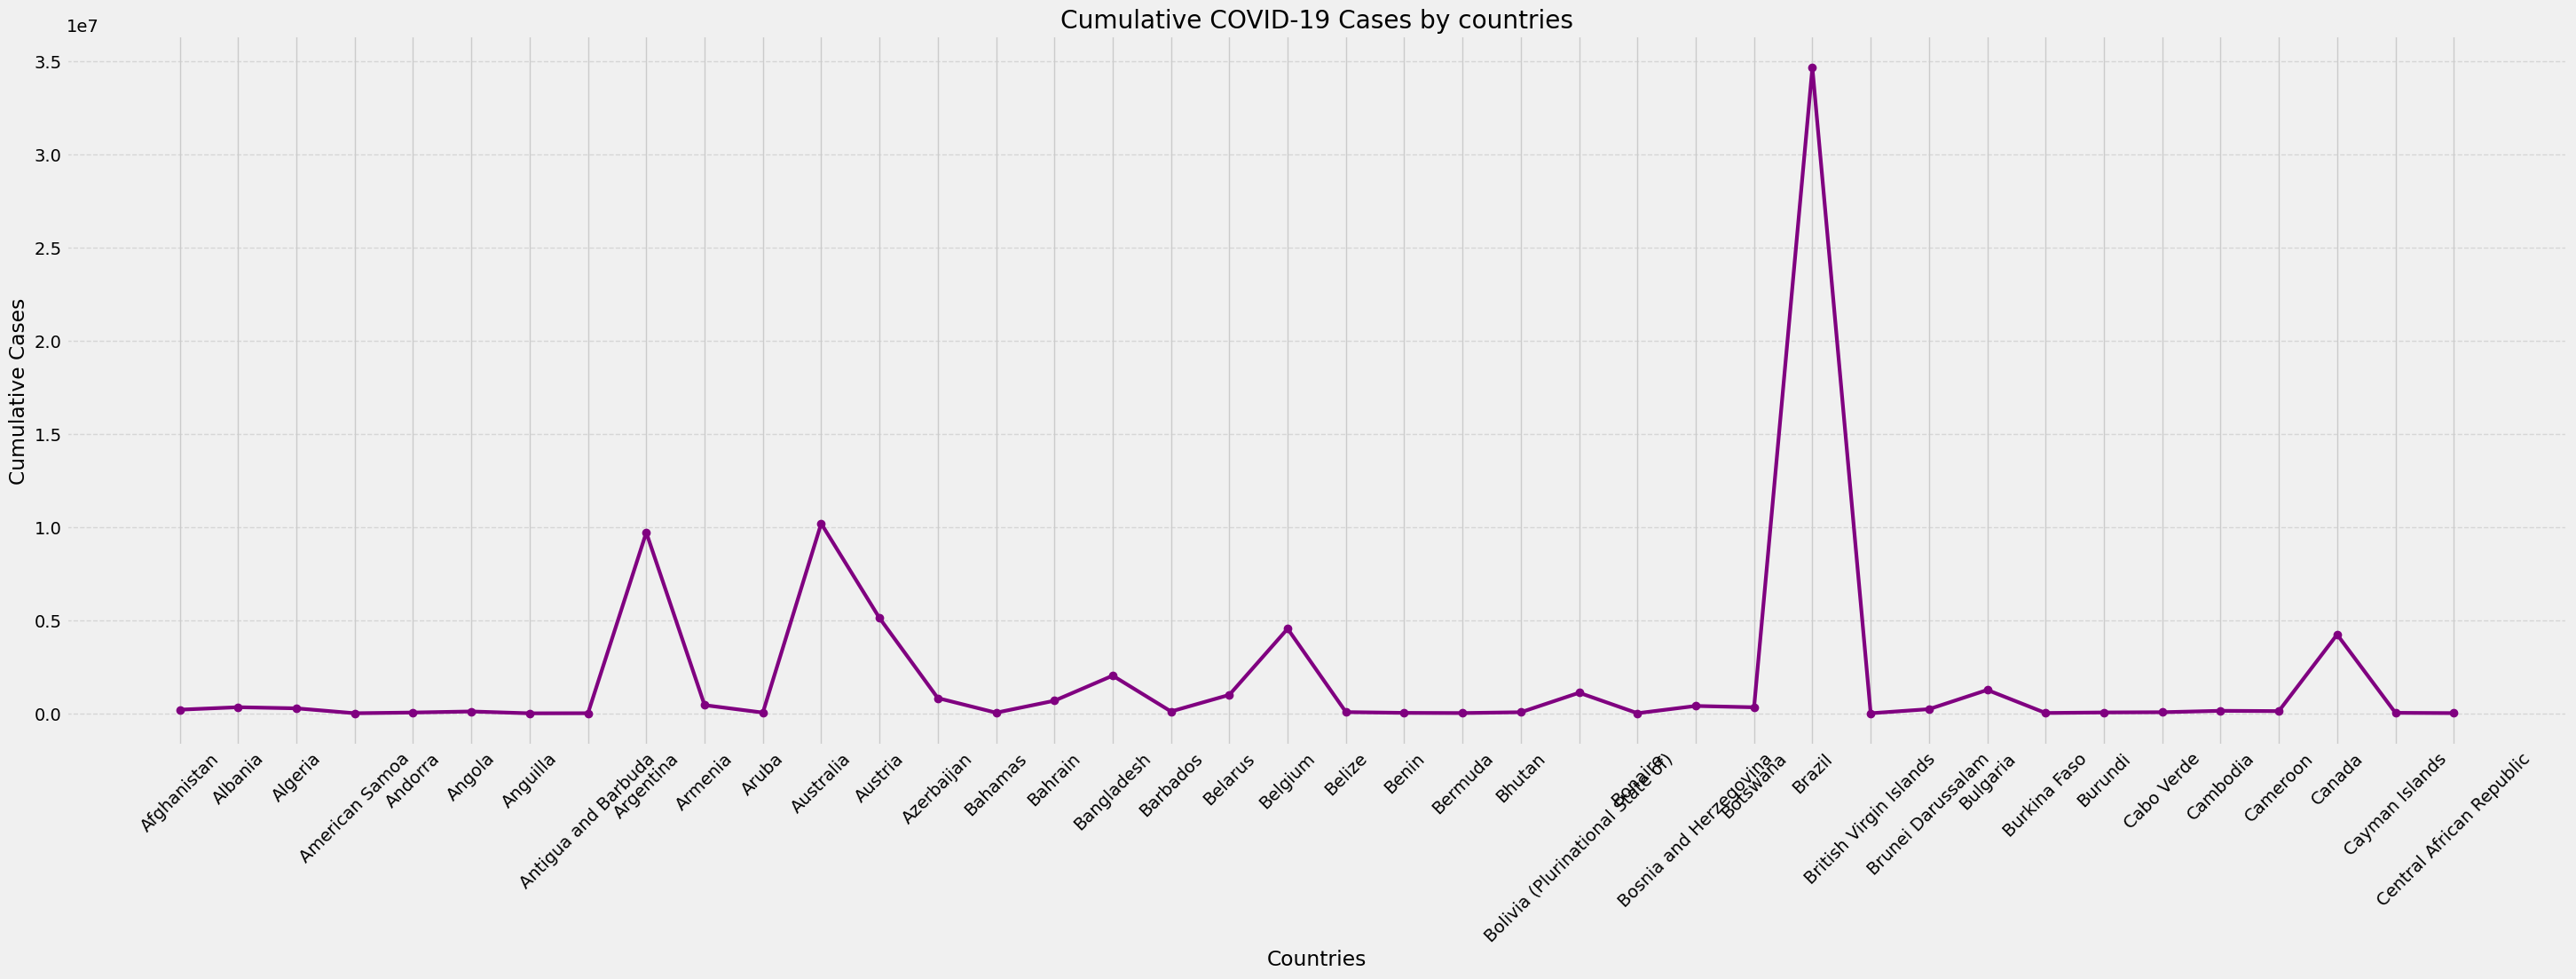

In [ ]:
#  Group the data by countries and sum the cumulative cases
region_cases = df.groupby('Name')['Cases - cumulative total'].sum().reset_index()

# Sort the data by cumulative cases and select the top 40 regions
top_regions = region_cases.head(40)

# Create a line plot of the data
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(top_regions['Name'], top_regions['Cases - cumulative total'], color='purple', marker='o', linewidth=3)

# Set the chart title and axis labels
ax.set_title('Cumulative COVID-19 Cases by countries')
ax.set_xlabel('Countries')
ax.set_ylabel('Cumulative Cases')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines and adjust padding
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout(pad=3)

# Show the chart
plt.show()


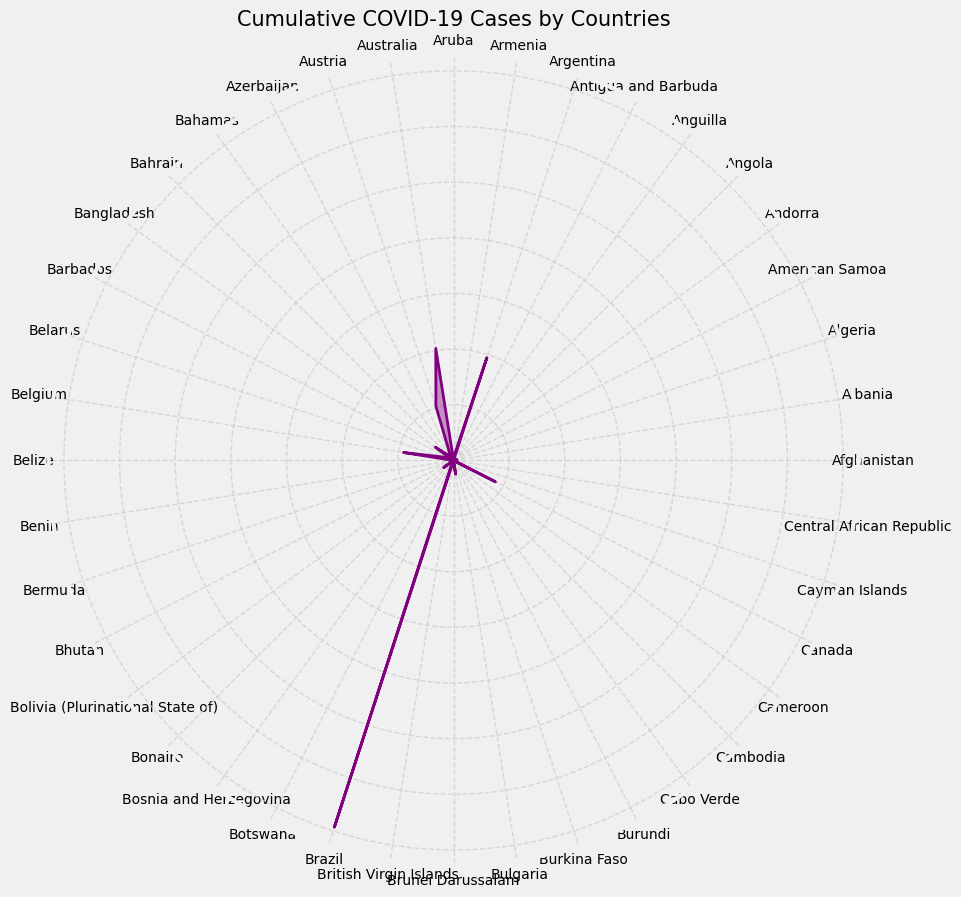

In [ ]:
# Create a spider chart of the data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
categories = top_regions['Name']
N = len(categories)
values = top_regions['Cases - cumulative total'].tolist()
values += values[:1]
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
ax.plot(angles, values, color='purple', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='purple', alpha=0.4)

# Set the chart title and axis labels
ax.set_title('Cumulative COVID-19 Cases by Countries', size=15, fontweight='regular')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)
ax.set_yticklabels([])

# Add grid lines
ax.grid(axis='both', alpha=0.7, linestyle='--')

# Show the chart
plt.show()

# Question 3

**Question: How does the newly reported COVID-19 cases look like across different countries?**

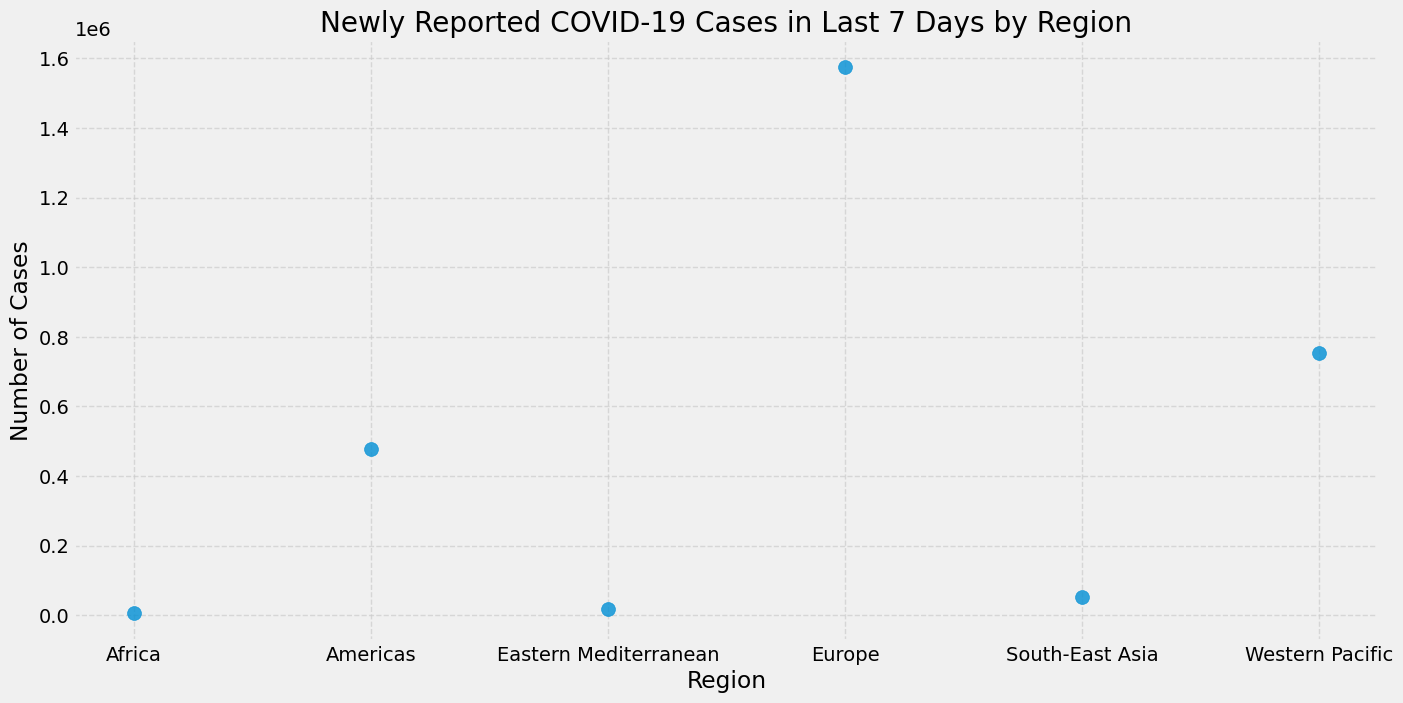

In [ ]:
# Group the data by region and date and calculate the sum of newly reported cases
latest_cases = df.groupby(['WHO Region'])['Cases - newly reported in last 7 days'].sum().reset_index()

# Create a scatter plot of the data
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(latest_cases.index, latest_cases['Cases - newly reported in last 7 days'], s=100, alpha=0.8)

# Set the chart title and axis labels
ax.set_title('Newly Reported COVID-19 Cases in Last 7 Days by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Number of Cases')

# Set x-axis ticks to display region names
ax.set_xticks(latest_cases.index)
ax.set_xticklabels(latest_cases['WHO Region'])

# Add grid lines and adjust padding
ax.grid(axis='both', linestyle='--', alpha=0.7)
fig.tight_layout(pad=3)

# Show the chart
plt.show()

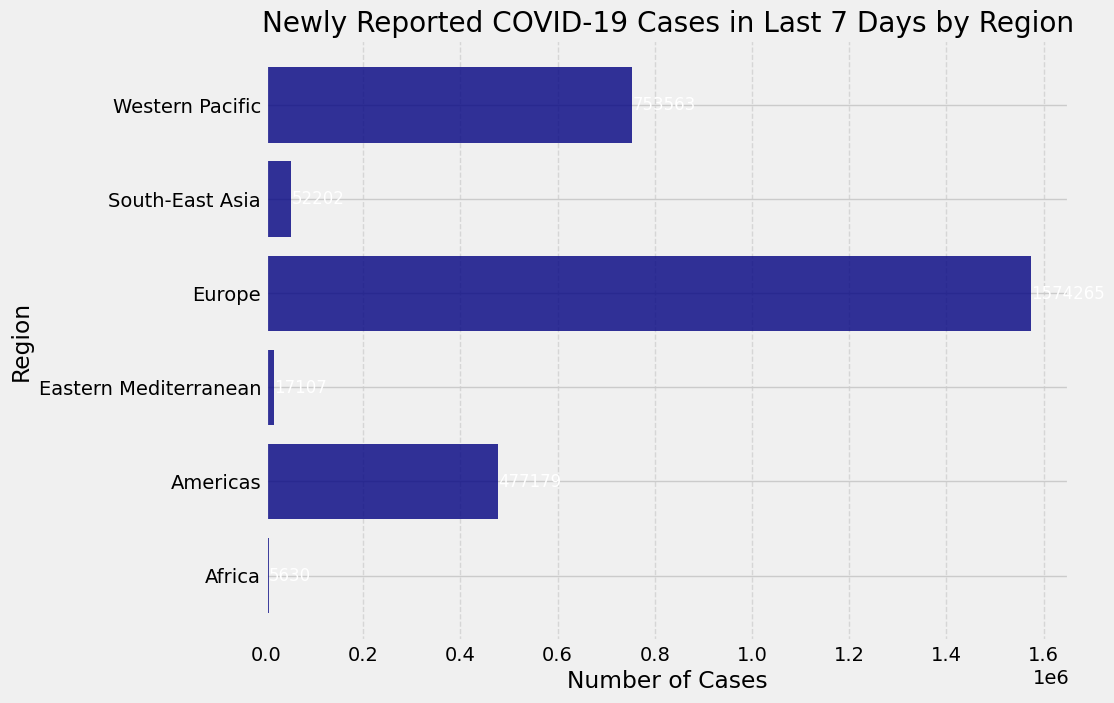

In [ ]:
# Group the data by region and date and calculate the sum of newly reported cases
latest_cases = df.groupby(['WHO Region'])['Cases - newly reported in last 7 days'].sum().reset_index()

# Create a horizontal bar chart of the data
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(latest_cases['WHO Region'], latest_cases['Cases - newly reported in last 7 days'], 
        align='center', color='navy', alpha=0.8)

# Set the chart title and axis labels
ax.set_title('Newly Reported COVID-19 Cases in Last 7 Days by Region')
ax.set_xlabel('Number of Cases')
ax.set_ylabel('Region')

# Add values on top of the bars
for i, v in enumerate(latest_cases['Cases - newly reported in last 7 days']):
    ax.text(v + 50, i, str(v), color='white', fontsize=12, va='center')

# Add grid lines and adjust padding
ax.grid(axis='x', linestyle='--', alpha=0.7)
fig.tight_layout(pad=3)

# Show the chart
plt.show()


# Question 4

**Question: How do the cumulative number of cases and deaths per 100000 population compare across different countries?**

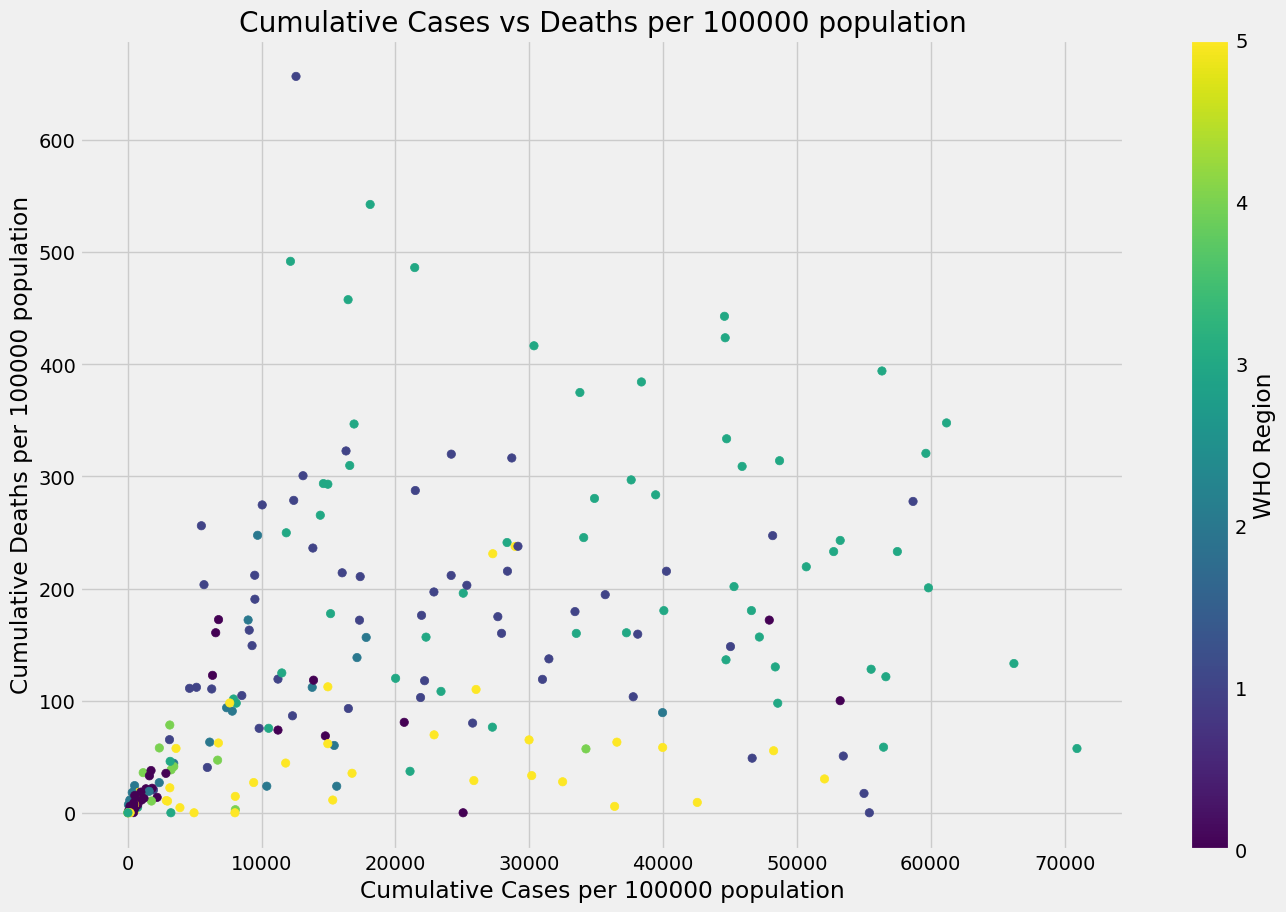

In [ ]:
# create a scatter plot
fig = plt.figure(figsize=(15, 10))

plt.scatter(df['Cases - cumulative total per 100000 population'], 
            df['Deaths - cumulative total per 100000 population'], 
            c=df['WHO Region'].astype('category').cat.codes)
plt.xlabel('Cumulative Cases per 100000 population')
plt.ylabel('Cumulative Deaths per 100000 population')
plt.title('Cumulative Cases vs Deaths per 100000 population')
plt.colorbar(label='WHO Region')
plt.show()

# Question 5

**Question: How has the ratio of deaths to total cases changed over time in each WHO region?**

In [ ]:
df['WHO Region'].unique()

array(['Americas', 'South-East Asia', 'Europe', 'Western Pacific',
       'Eastern Mediterranean', 'Africa'], dtype=object)

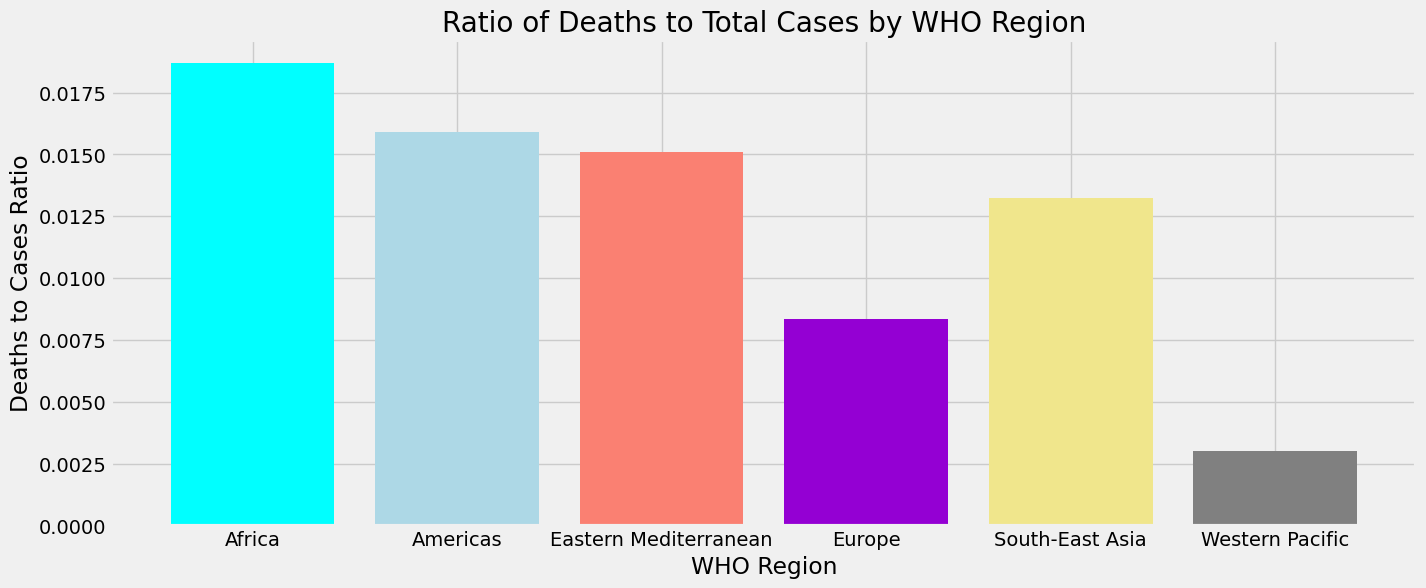

In [ ]:
# Group by WHO Region and calculate the ratio of Deaths to Cases for each group
df_grouped = df.groupby('WHO Region').apply(lambda x: x['Deaths - cumulative total'].sum() / x['Cases - cumulative total'].sum())

# Convert the result to a DataFrame and reset the index
df_plot = df_grouped.reset_index(name='Ratio')

# Set the colors for the bars based on the WHO Region
colors = {'Africa': 'cyan', 'Americas': 'lightblue', 'Eastern Mediterranean': 'salmon',
          'Europe': 'darkviolet', 'South-East Asia': 'khaki', 'Western Pacific': 'gray'}

# Create a bar plot with WHO Region on the x-axis and Ratio on the y-axis
fig, ax = plt.subplots(figsize=(15, 6))
for i, row in df_plot.iterrows():
    ax.bar(row['WHO Region'], row['Ratio'], color=colors[row['WHO Region']])

# Set the axis labels and title
ax.set_xlabel('WHO Region')
ax.set_ylabel('Deaths to Cases Ratio')
ax.set_title('Ratio of Deaths to Total Cases by WHO Region')

# Show the plot
plt.show()


# SOME MORE VISUALIZATIONS

In [ ]:
vdf = pd.read_csv('vaccination-data.csv')
vdf.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,28/09/2022,11881035.0,10929549.0,30.520,28.076,10245183.0,26.318,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",22/02/2021,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,18/09/2022,2974247.0,1336938.0,103.400,46.977,1262982.0,44.378,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",13/01/2021,5.0,356077.0,12.512
2,Algeria,DZA,AFRO,REPORTING,4/9/2022,15267442.0,7840131.0,34.817,17.879,6481186.0,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",30/01/2021,4.0,NaN,NaN
3,American Samoa,ASM,WPRO,REPORTING,23/08/2022,111316.0,44885.0,201.670,81.318,41423.0,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",21/12/2020,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,11/9/2022,154235.0,57894.0,199.600,75.999,53480.0,70.205,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",20/01/2021,3.0,42861.0,56.265


In [ ]:
vdf.columns

Index(['COUNTRY', 'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED',
       'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100'],
      dtype='object')

In [ ]:
vdf_new = vdf.copy().dropna(axis=0)

In [ ]:
# vdf_new.dropna(axis=0)

In [ ]:
vdf1 = vdf_new.drop(columns=['ISO3', 'DATA_SOURCE', 'DATE_UPDATED']).copy()
vdf1

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
1,Albania,EURO,2974247.0,1336938.0,103.400,46.977,1262982.0,44.378,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",13/01/2021,5.0,356077.0,12.512
3,American Samoa,WPRO,111316.0,44885.0,201.670,81.318,41423.0,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",21/12/2020,3.0,24160.0,43.770
4,Andorra,EURO,154235.0,57894.0,199.600,75.999,53480.0,70.205,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",20/01/2021,3.0,42861.0,56.265
6,Anguilla,AMRO,24102.0,10846.0,160.659,72.297,10314.0,68.751,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",5/2/2021,2.0,2942.0,19.611
7,Antigua and Barbuda,AMRO,136512.0,64290.0,139.399,65.650,62384.0,63.703,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",1/3/2021,6.0,9838.0,10.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Vanuatu,WPRO,260304.0,143339.0,84.750,46.668,130607.0,42.523,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2/6/2021,3.0,15966.0,5.198
222,Venezuela (Bolivarian Republic of),AMRO,37860994.0,22157232.0,133.145,77.920,14287370.0,50.244,"Beijing CNBG - BBIBP-CorV,CIGB - CIGB-66,Finla...",22/02/2021,6.0,651502.0,2.291
223,Viet Nam,WPRO,259176472.0,89880152.0,266.263,92.338,84072281.0,86.371,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",8/3/2021,6.0,55285754.0,56.797
224,Wallis and Futuna,WPRO,16782.0,6592.0,149.226,58.616,6989.0,62.147,Moderna - Spikevax,19/03/2021,1.0,3201.0,28.463


In [ ]:
vdf1.columns

Index(['COUNTRY', 'WHO_REGION', 'TOTAL_VACCINATIONS',
       'PERSONS_VACCINATED_1PLUS_DOSE', 'TOTAL_VACCINATIONS_PER100',
       'PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_FULLY_VACCINATED',
       'PERSONS_FULLY_VACCINATED_PER100', 'VACCINES_USED',
       'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED',
       'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100'],
      dtype='object')

In [ ]:
total_vax = vdf1[["COUNTRY", "TOTAL_VACCINATIONS"]]
total_vax

,COUNTRY,TOTAL_VACCINATIONS
1,Albania,2974247.0
3,American Samoa,111316.0
4,Andorra,154235.0
6,Anguilla,24102.0
7,Antigua and Barbuda,136512.0
...,...,...
221,Vanuatu,260304.0
222,Venezuela (Bolivarian Republic of),37860994.0
223,Viet Nam,259176472.0
224,Wallis and Futuna,16782.0


In [ ]:
# Merge the two datasets on the country name
merged_df = pd.merge(df, vdf1, how='left', left_on='Name', right_on='COUNTRY')

mdf = merged_df.dropna().drop(['Name', 'WHO_REGION'], axis=1)

In [ ]:
mdf.columns

Index(['WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours', 'COUNTRY',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED',
       'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100'],
      dtype='object')

# Question 6

**How does the cumulative cases vary based on WHO regions?**

In [ ]:

class CovidData:
    def __init__(self, file_path):
        self.df = df
    
    # trying the treemap
    def total_cases_by_region_treemap(self):
        region_totals = self.df.groupby('WHO Region')['Cases - cumulative total'].max().reset_index()
        region_totals['log_cases'] = region_totals['Cases - cumulative total'].apply(lambda x: 0 if x == 0 else round(1 + 9 * (x / max(region_totals['Cases - cumulative total']))))
        region_totals = region_totals.sort_values(by='Cases - cumulative total', ascending=False)
        colors = sns.color_palette('hls', n_colors=len(region_totals))
        fig, ax = plt.subplots(figsize=(30, 10))
        squarify.plot(sizes=region_totals['Cases - cumulative total'], label=region_totals['WHO Region'], color=colors, alpha=0.8, text_kwargs={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'})
        plt.axis('off')
        plt.title('COVID-19 Cumulative Cases by WHO Region', fontsize=16)
        plt.legend(loc='lower left', bbox_to_anchor=(0.01, 0.01), fontsize=12)
        plt.show()

    # trying the bar plot
    def total_cases_by_region_bar(self):
        plt.figure(figsize=(16,6))
        ax = sns.barplot(x='WHO Region', y='Cases - cumulative total', data=self.df, estimator=max, errorbar=None)
        plt.title('COVID-19 Cumulative Cases by WHO Region', fontsize=16)
        plt.xlabel('WHO Region', fontsize=14)
        plt.ylabel('Cumulative Cases', fontsize=14)
        plt.tick_params(labelsize=12)
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=12)
        plt.show()    

    # trying the dot plot
    def dot_plot(self):
        plt.figure(figsize=(20, 16))
        sns.set_style('whitegrid')
        sns.stripplot(x='Cases - cumulative total per 100000 population', y='WHO Region', data=self.df, jitter=0.4, size=8, palette='Set2')
        plt.xlabel('Cumulative Cases per 100,000 Population', fontsize=14)
        plt.ylabel('WHO Region', fontsize=14)
        plt.legend(title='Regions', loc='lower right', labels=['South-East Asia', 'Americas', 'Eastern Mediterranean', 'Africa', 'Western Pacific', 'Europe', 'Other'])
        plt.title('COVID-19 Cumulative Cases per 100,000 Population by WHO Region', fontsize=16)
        plt.show()

data = CovidData(mdf)

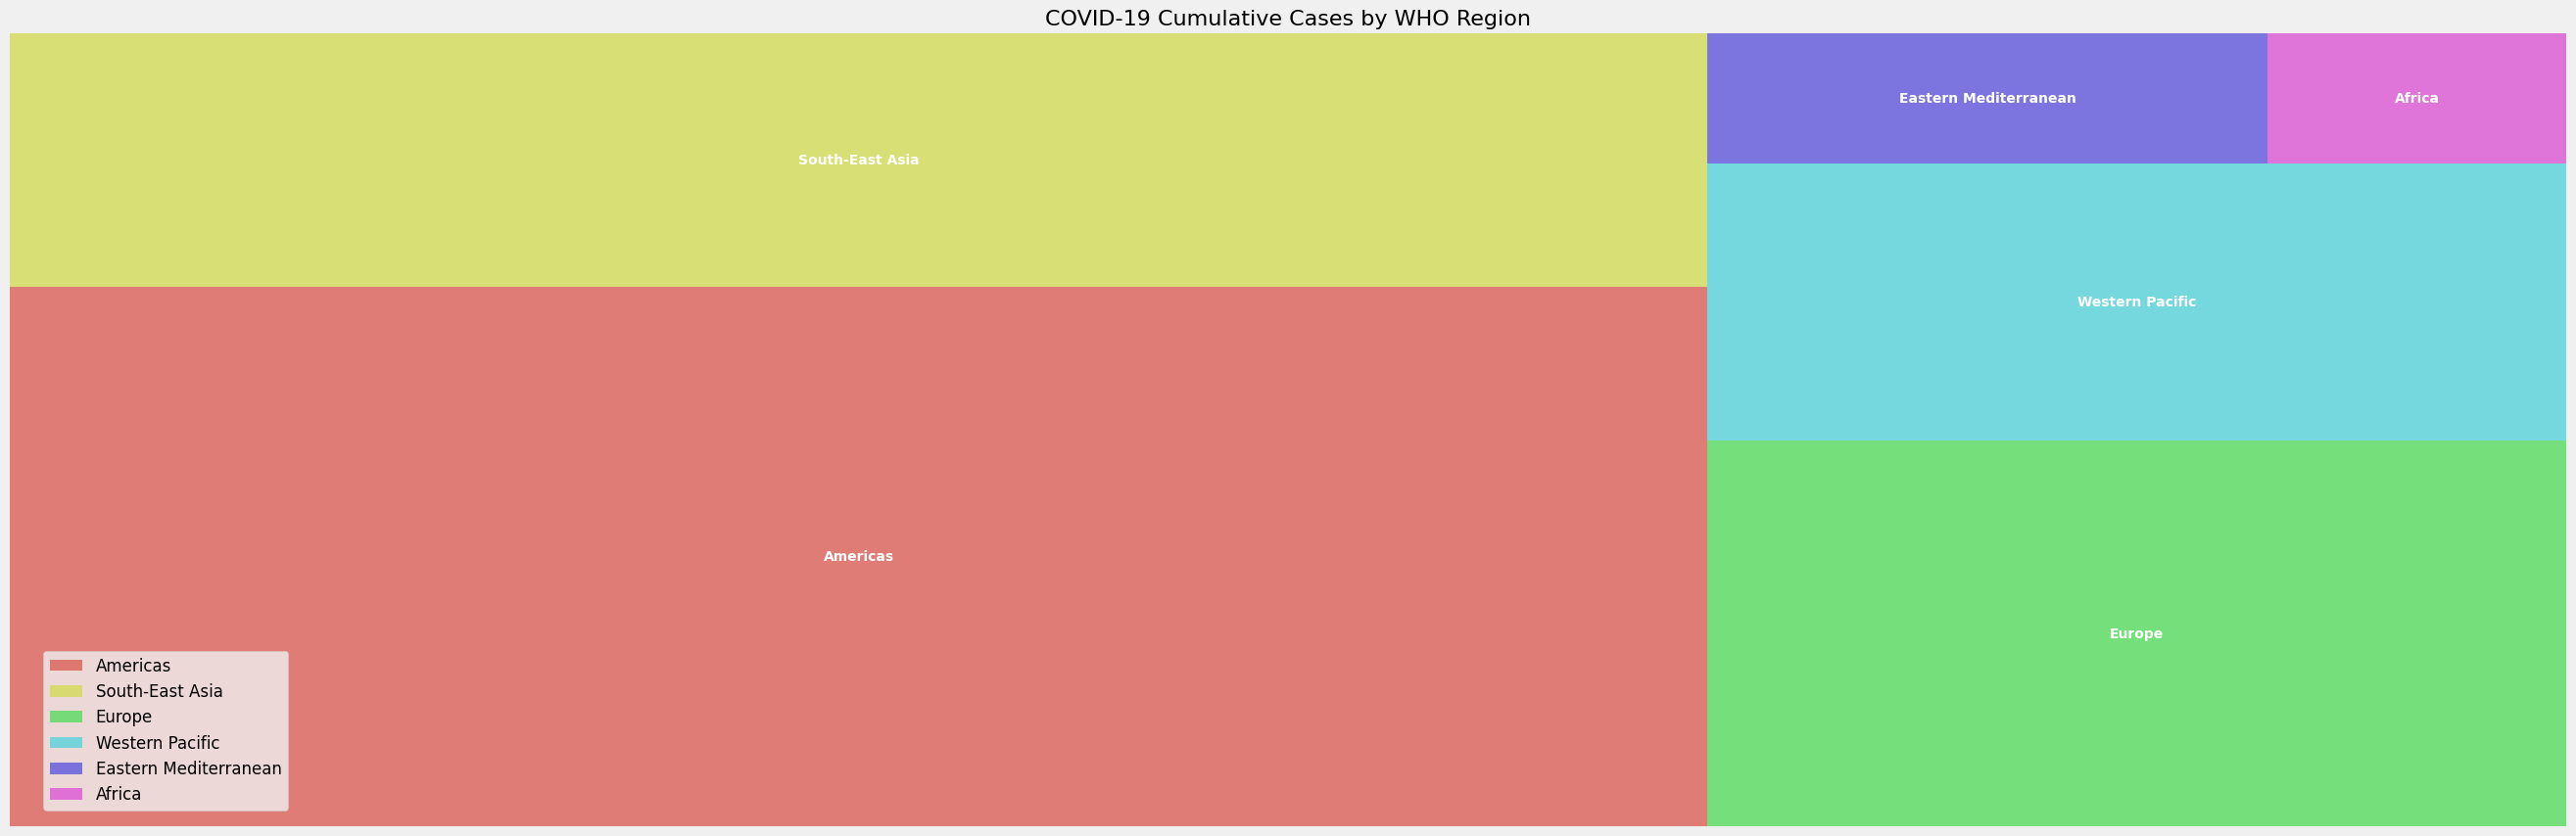

In [ ]:
data.total_cases_by_region_treemap()

<ipython-input-28-0a65e6b8a3fe>:35: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Cases - cumulative total per 100000 population', y='WHO Region', data=self.df, jitter=0.4, size=8, palette='Set2')


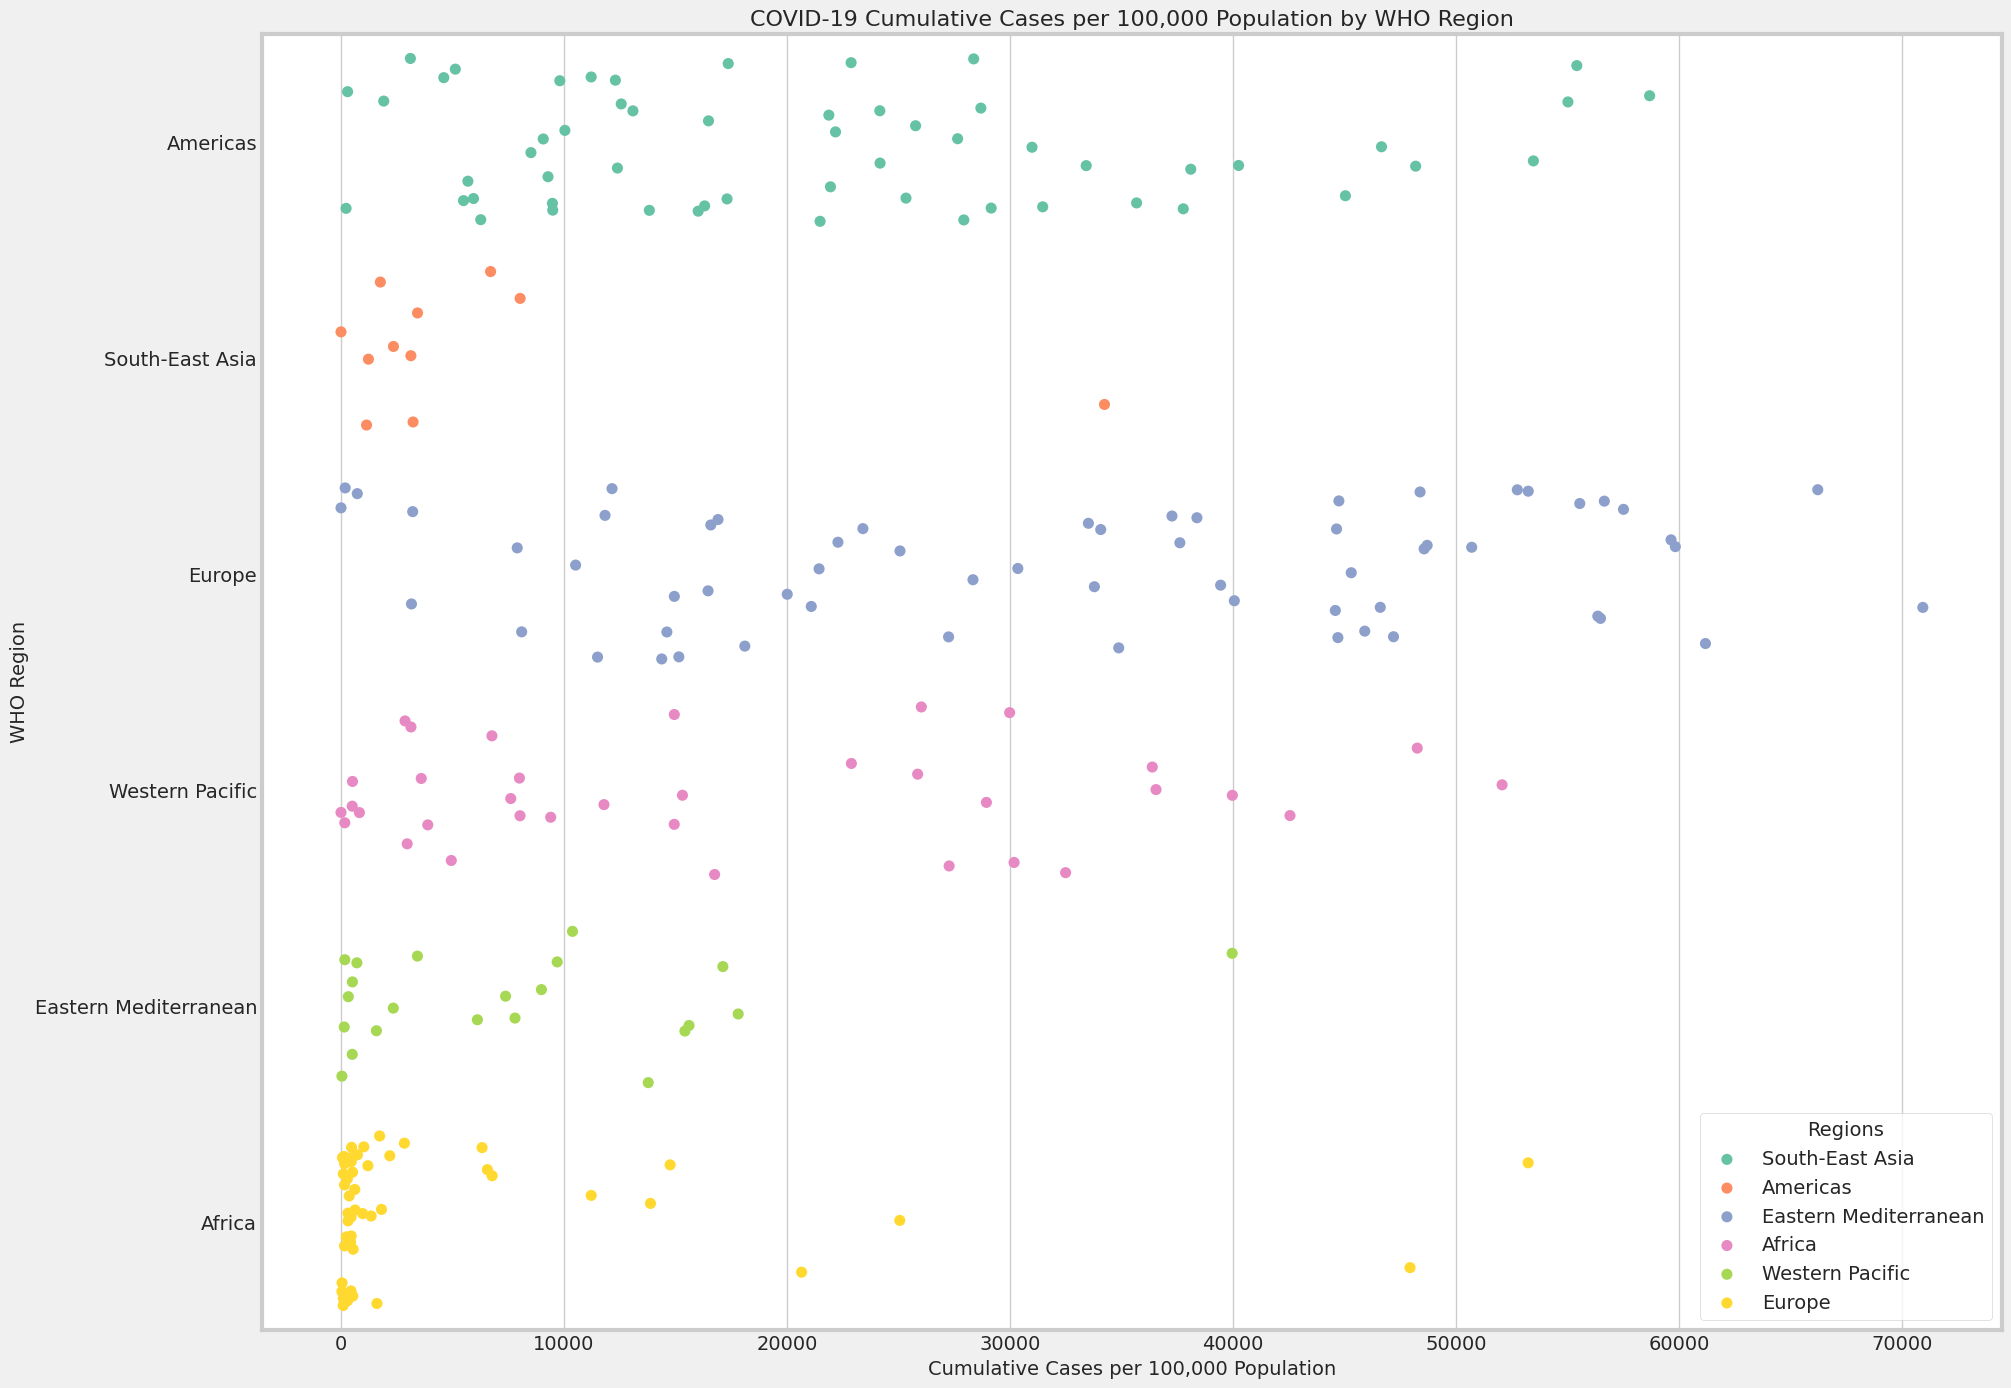

In [ ]:
data.dot_plot()

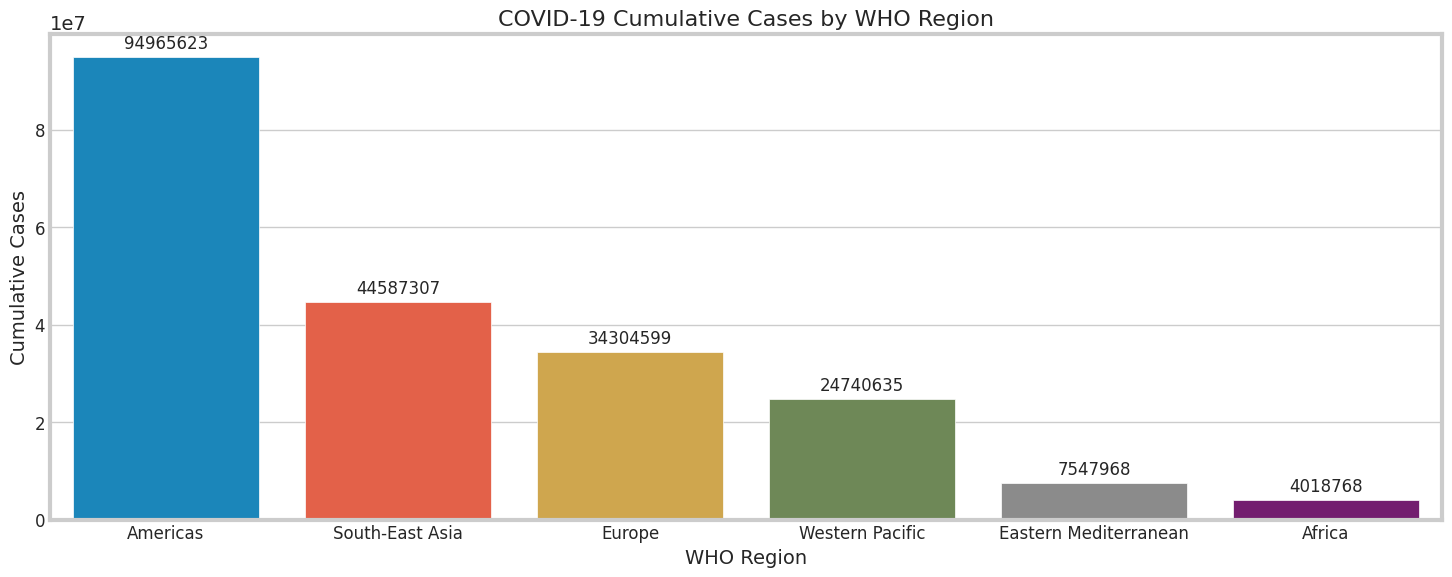

In [ ]:
data.total_cases_by_region_bar()

# Question 7

**How does the cumulative cases vary based on WHO regions?**

In [ ]:
class MergedVisualizer:
    def __init__(self, data):
        self.data = data
    def plot_cases_deaths_vs_vaccination(self):
        relevant_df = self.data[['COUNTRY', 'Cases - newly reported in last 7 days', 'Deaths - newly reported in last 7 days', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100']].copy()
        relevant_df.loc[:, 'vaccination_rate'] = relevant_df['PERSONS_VACCINATED_1PLUS_DOSE_PER100'] / 100
        relevant_df = relevant_df[(relevant_df['Cases - newly reported in last 7 days'] >= 1000) | (relevant_df['Deaths - newly reported in last 7 days'] >= 50) & (relevant_df['vaccination_rate'] <= 0.3)]
        
        # Create scatter plot with color gradient for death counts
        plt.figure(figsize=(30, 10))
        cmap = sns.cubehelix_palette(as_cmap=True, start=2, rot=0, dark=0, light=1)
        scatter_plot = sns.scatterplot(data=relevant_df, 
                        x='vaccination_rate', 
                        y='Cases - newly reported in last 7 days', 
                        hue='Deaths - newly reported in last 7 days', 
                        size='Deaths - newly reported in last 7 days', 
                        sizes=(220, 500), 
                        alpha=0.8, 
                        palette='RdBu')
        
        # Add labels and title
        plt.xlabel('Vaccination rate per capita', fontsize=14)
        plt.ylabel('Newly reported cases in last 7 days', fontsize=14)
        plt.title('Countries with high cases and deaths, but low vaccination rates', fontsize=16)
        plt.tick_params(labelsize=12)
        plt.legend(fontsize=12, title='New deaths in last 7 days', title_fontsize=12, loc='upper left')

        # Add data point labels for countries with more than 150000 cases reported in the last 7 days
        for line in range(0,relevant_df.shape[0]):
            if relevant_df.iloc[line]['Cases - newly reported in last 7 days'] > 150000:
                scatter_plot.text(relevant_df.iloc[line]['vaccination_rate']+0.002, 
                                   relevant_df.iloc[line]['Cases - newly reported in last 7 days'], 
                                   relevant_df.iloc[line]['COUNTRY'], 
                                   horizontalalignment='left', 
                                   size='medium', 
                                   color='black', 
                                   weight='semibold')
        
        plt.show()

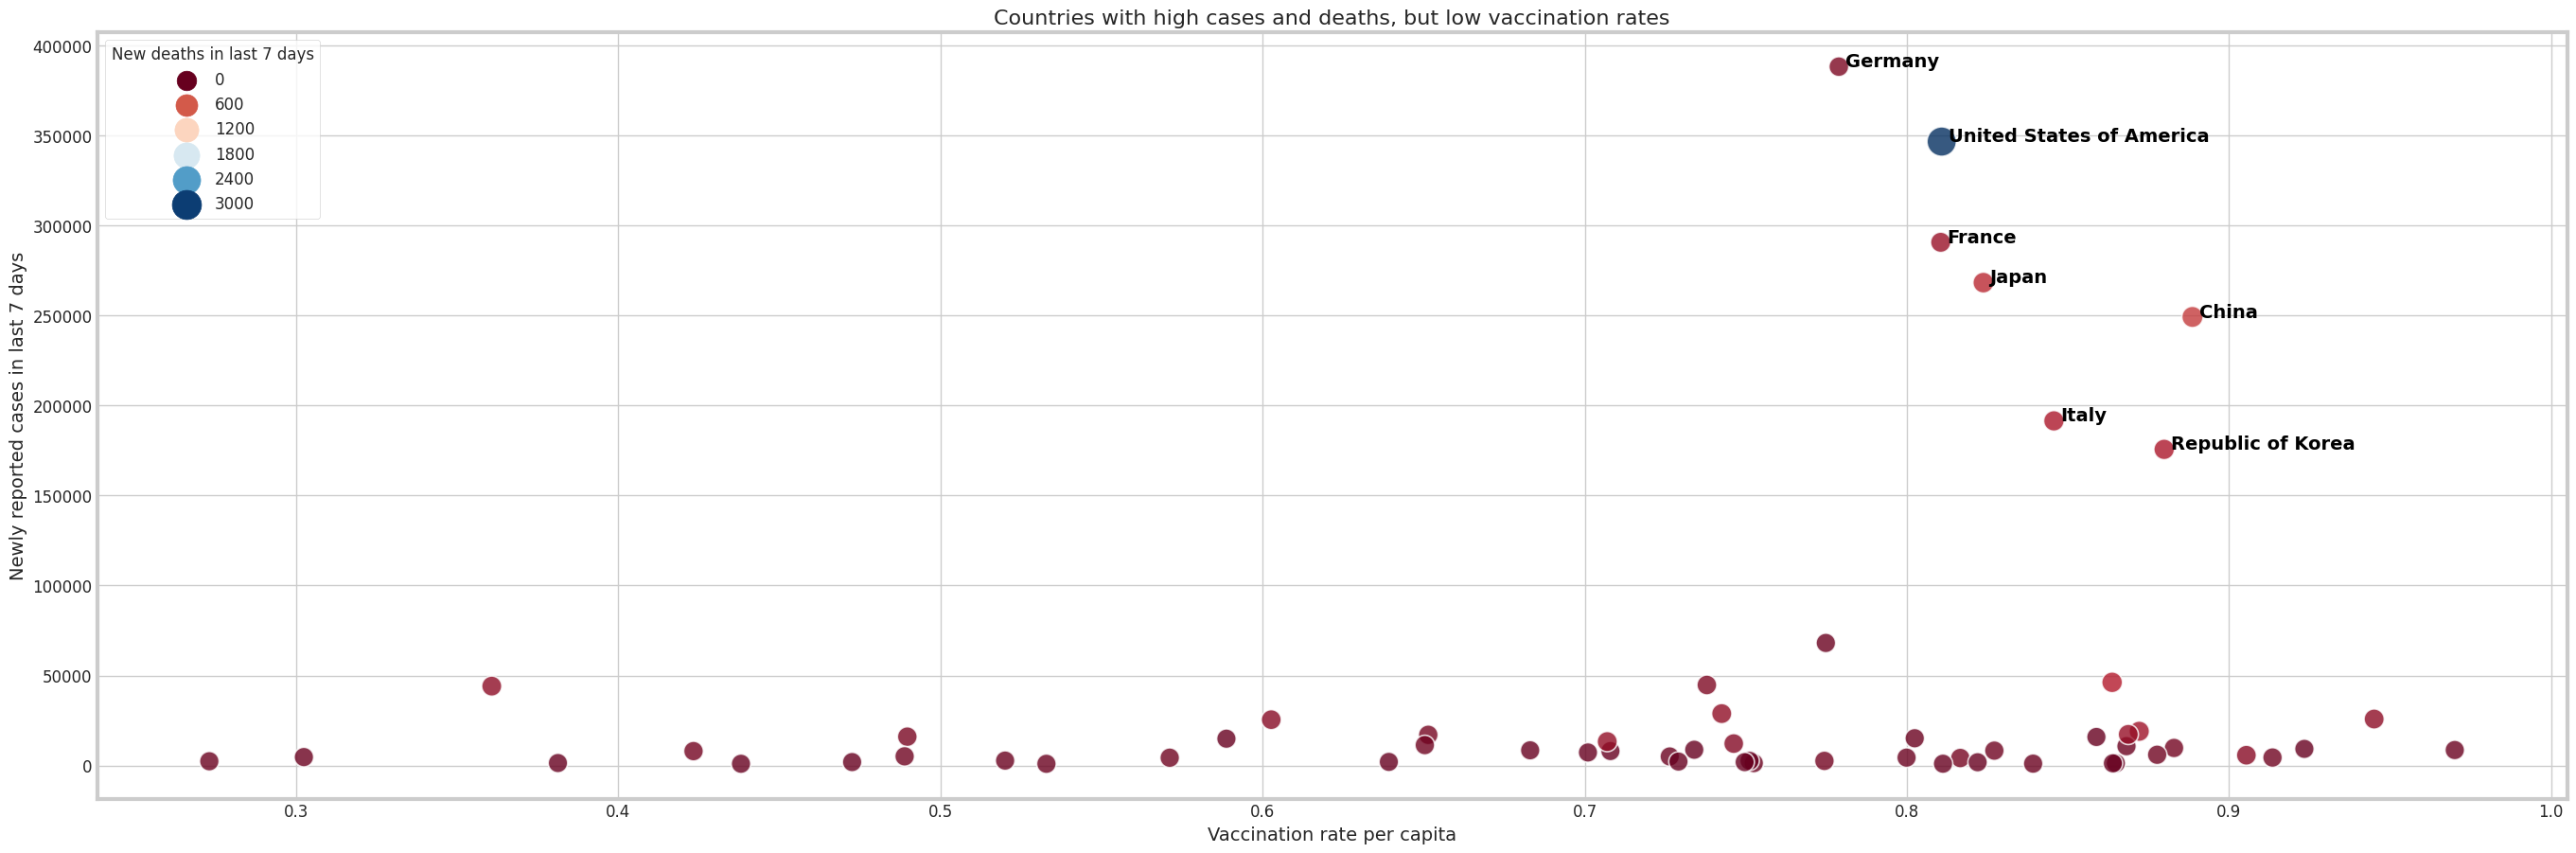

In [ ]:
if __name__ == '__main__':
  # Create instance of CovidDataVisualizer
  visualizer = MergedVisualizer(mdf)
  # Plot cases and deaths vs. vaccination rate
  visualizer.plot_cases_deaths_vs_vaccination()


# Question 8

**Question: How do vaccination rates (total vaccinations and fully vaccinated persons) vary across different countries?**

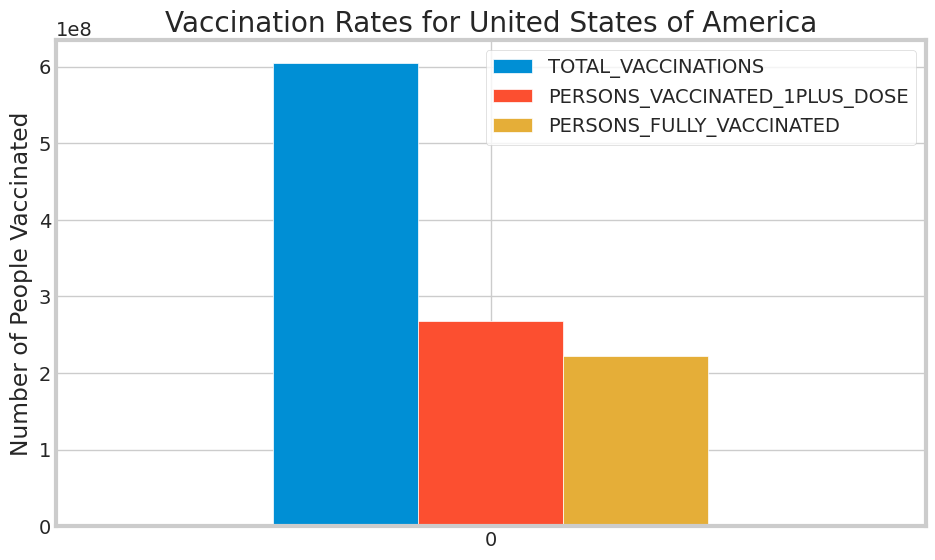

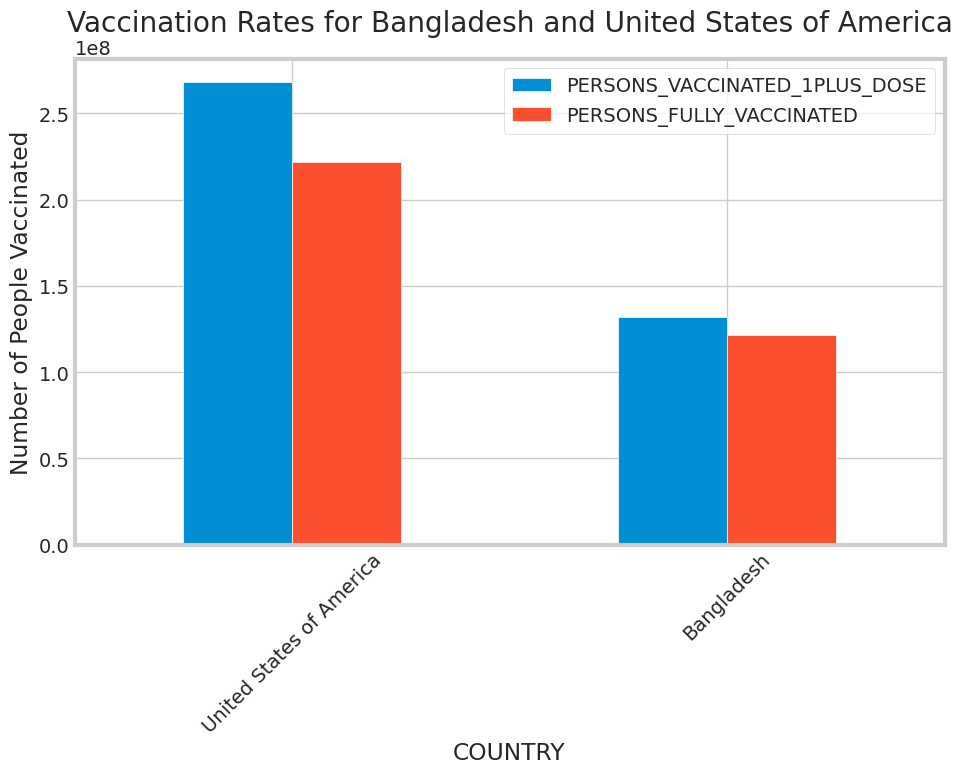

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class VaccinationRates:
    def __init__(self, df):
        self.df = df
        
    def get_country_vaccination_rates(self, country):
        country_data = self.df[self.df['COUNTRY'] == country]
        return country_data[['TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE', 
                             'PERSONS_FULLY_VACCINATED']]
    
    def plot_country_vaccination_rates(self, country):
        country_data = self.get_country_vaccination_rates(country)
        ax = country_data.plot(kind='bar', figsize=(10, 6))
        ax.set_title(f'Vaccination Rates for {country}')
        ax.set_ylabel('Number of People Vaccinated')
        ax.set_xticklabels(country_data.index, rotation=0)
        plt.show()

    def compare_country_vaccination_rates(self, country1, country2):
      countries_data = self.df[self.df['COUNTRY'].isin([country1, country2])]
      countries_data = countries_data[['COUNTRY', 'PERSONS_VACCINATED_1PLUS_DOSE', 'PERSONS_FULLY_VACCINATED']]
      countries_data = countries_data.set_index('COUNTRY')
      fig, ax = plt.subplots(figsize=(10, 6))
      countries_data.plot(kind='bar', rot=45, ax=ax)
      ax.set_title(f'Vaccination Rates for {country1} and {country2}')
      ax.set_ylabel('Number of People Vaccinated')
      plt.show()
        
    # def compare_country_vaccination_rates(self, country1, country2):
    #     countries_data = self.df[self.df['COUNTRY'].isin([country1, country2])]
    #     countries_data = countries_data[['COUNTRY', 'PERSONS_VACCINATED_1PLUS_DOSE', 'PERSONS_FULLY_VACCINATED']]
    #     countries_data = countries_data.set_index('COUNTRY')
    #     countries_data.plot(kind='bar', rot=45)
    #     plt.title(f'Vaccination Rates for {country1} and {country2}')
    #     plt.ylabel('Number of People Vaccinated')
    #     plt.show()

if __name__ == '__main__':
  vaccination_rates = VaccinationRates(mdf)
  vaccination_rates.plot_country_vaccination_rates('United States of America')
  vaccination_rates.compare_country_vaccination_rates('Bangladesh', 'United States of America')

# Question 9

**Question: How does the vaccination rate vary over time based on WHO regions?**

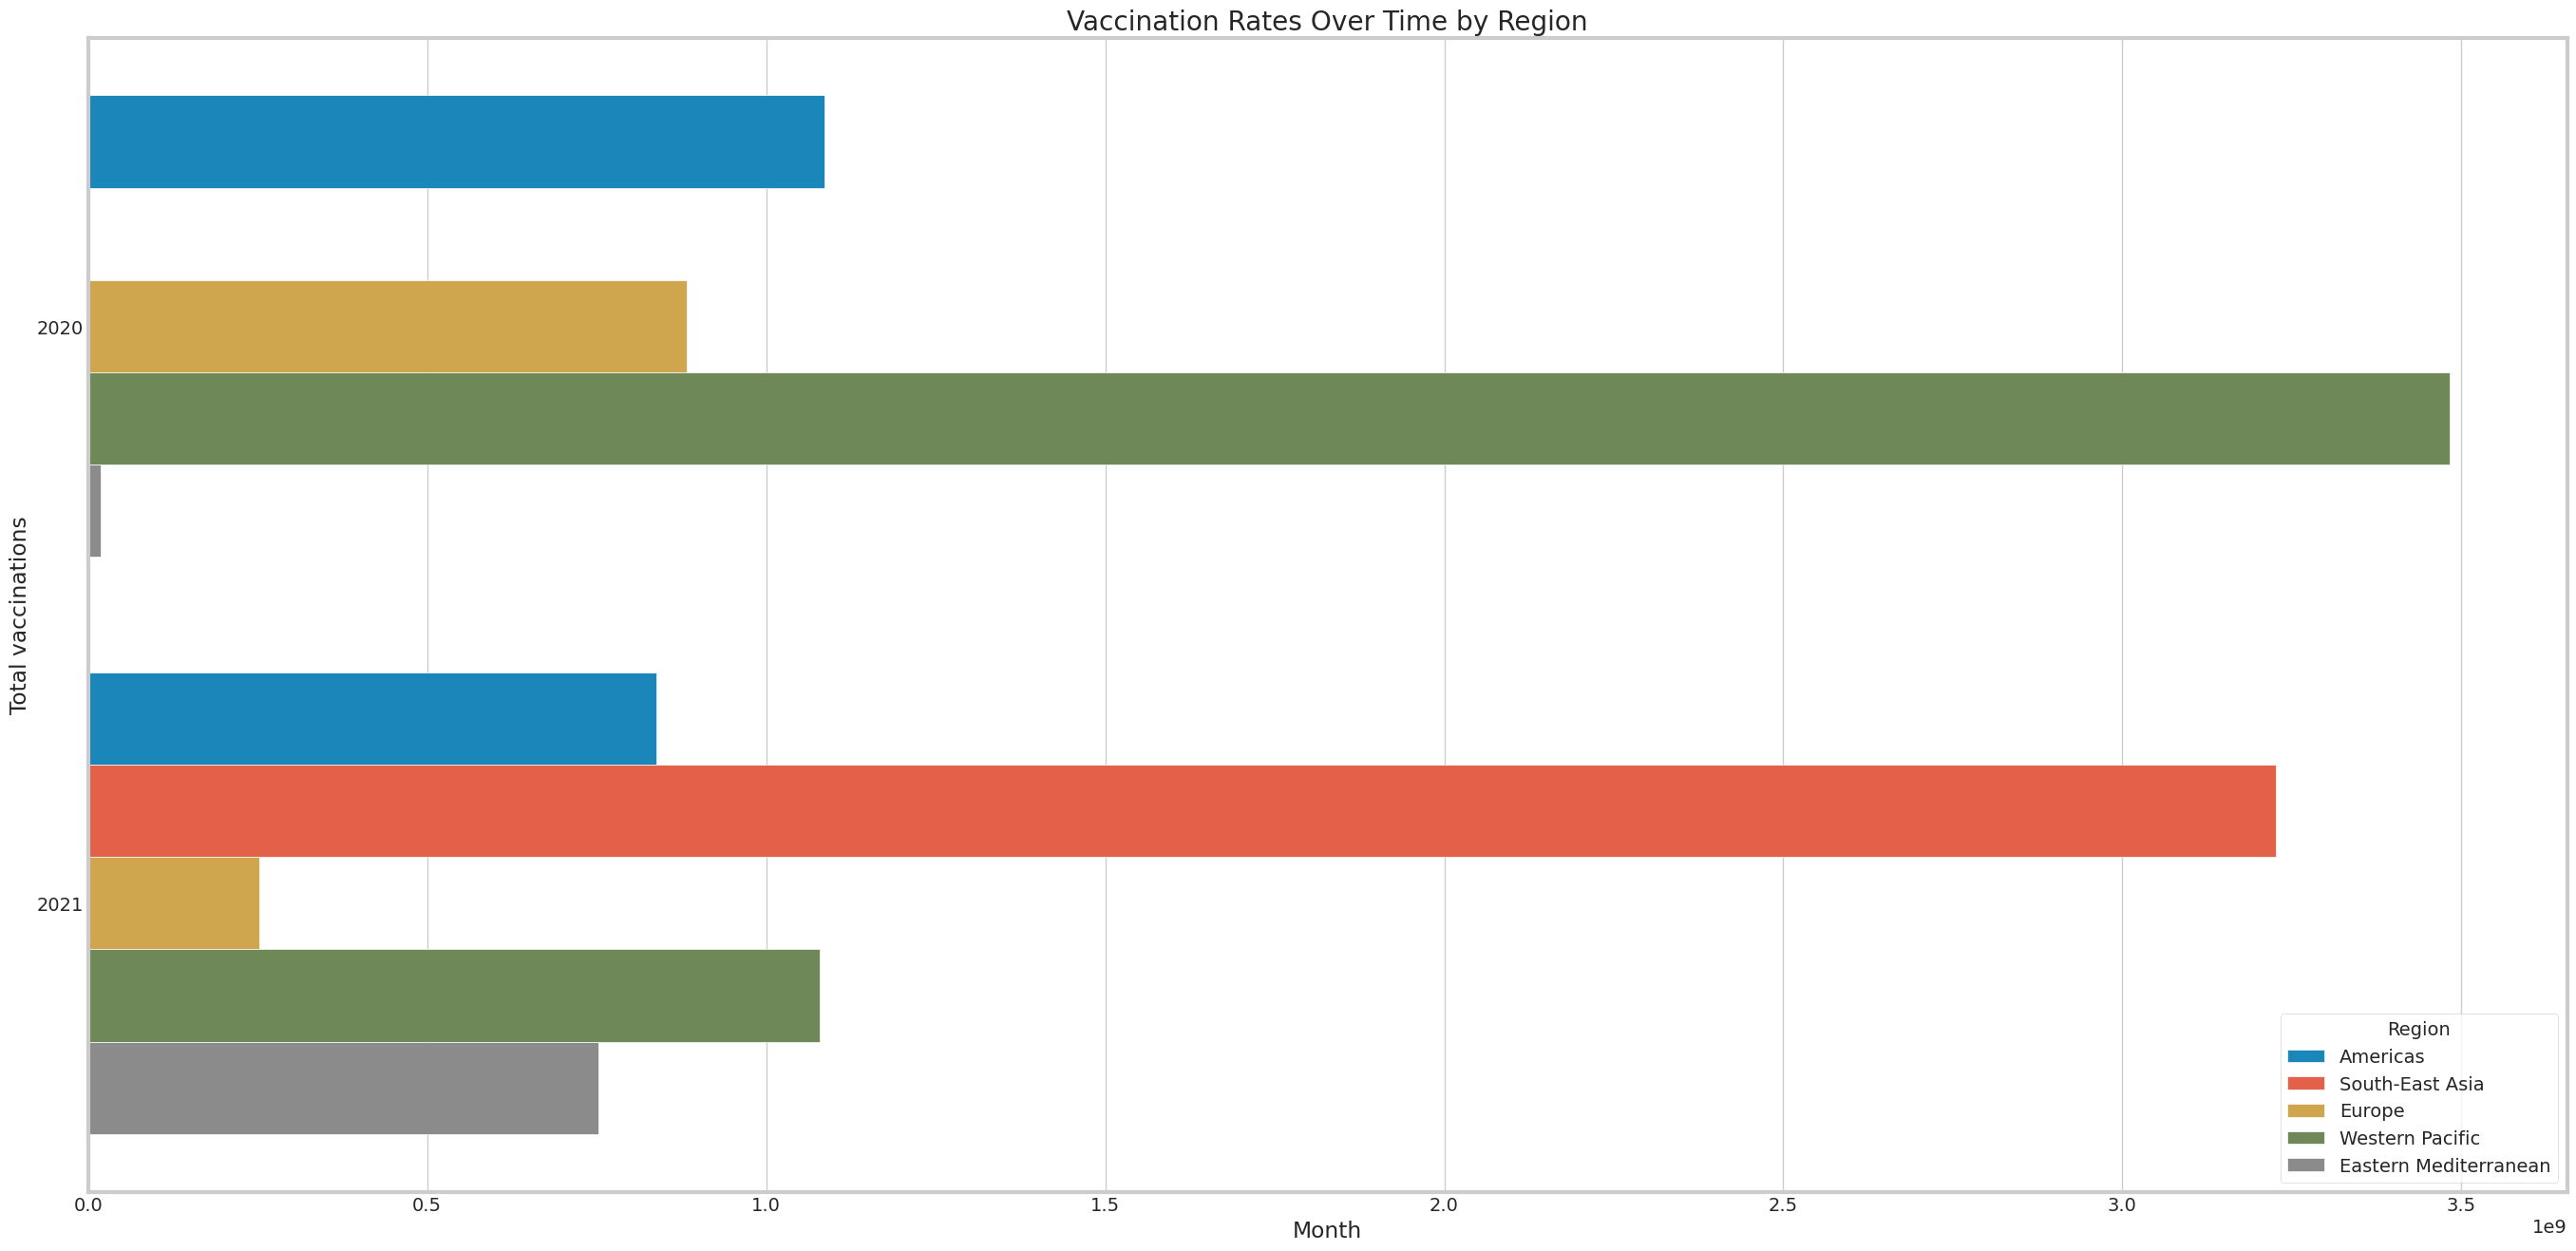

In [ ]:
class VaccinationData:
    def __init__(self, df):
        self.df = df
    
    def plot_vaccination_rates(self):
        regions = self.df['WHO Region'].unique()
        monthly_vaccinations = []
        for region in regions:
            region_df = self.df[self.df['WHO Region'] == region].copy()
            region_df['Month'] = pd.to_datetime(region_df['FIRST_VACCINE_DATE'], format='%d/%m/%Y').dt.to_period('Y')
            region_vaccinations = region_df.groupby('Month')['TOTAL_VACCINATIONS'].sum().reset_index()
            region_vaccinations['Region'] = region
            monthly_vaccinations.append(region_vaccinations)
        merged_df = pd.concat(monthly_vaccinations)
        plt.figure(figsize=(30, 15))
        sns.barplot(data=merged_df, y='Month', x='TOTAL_VACCINATIONS', hue='Region')
        plt.xlabel('Month')
        plt.ylabel('Total vaccinations')
        plt.title('Vaccination Rates Over Time by Region')
        plt.show()

if __name__ == '__main__':
    vd = VaccinationData(mdf)
    vd.plot_vaccination_rates()

/usr/local/lib/python3.9/dist-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.9/dist-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.9/dist-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.9/dist-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure th

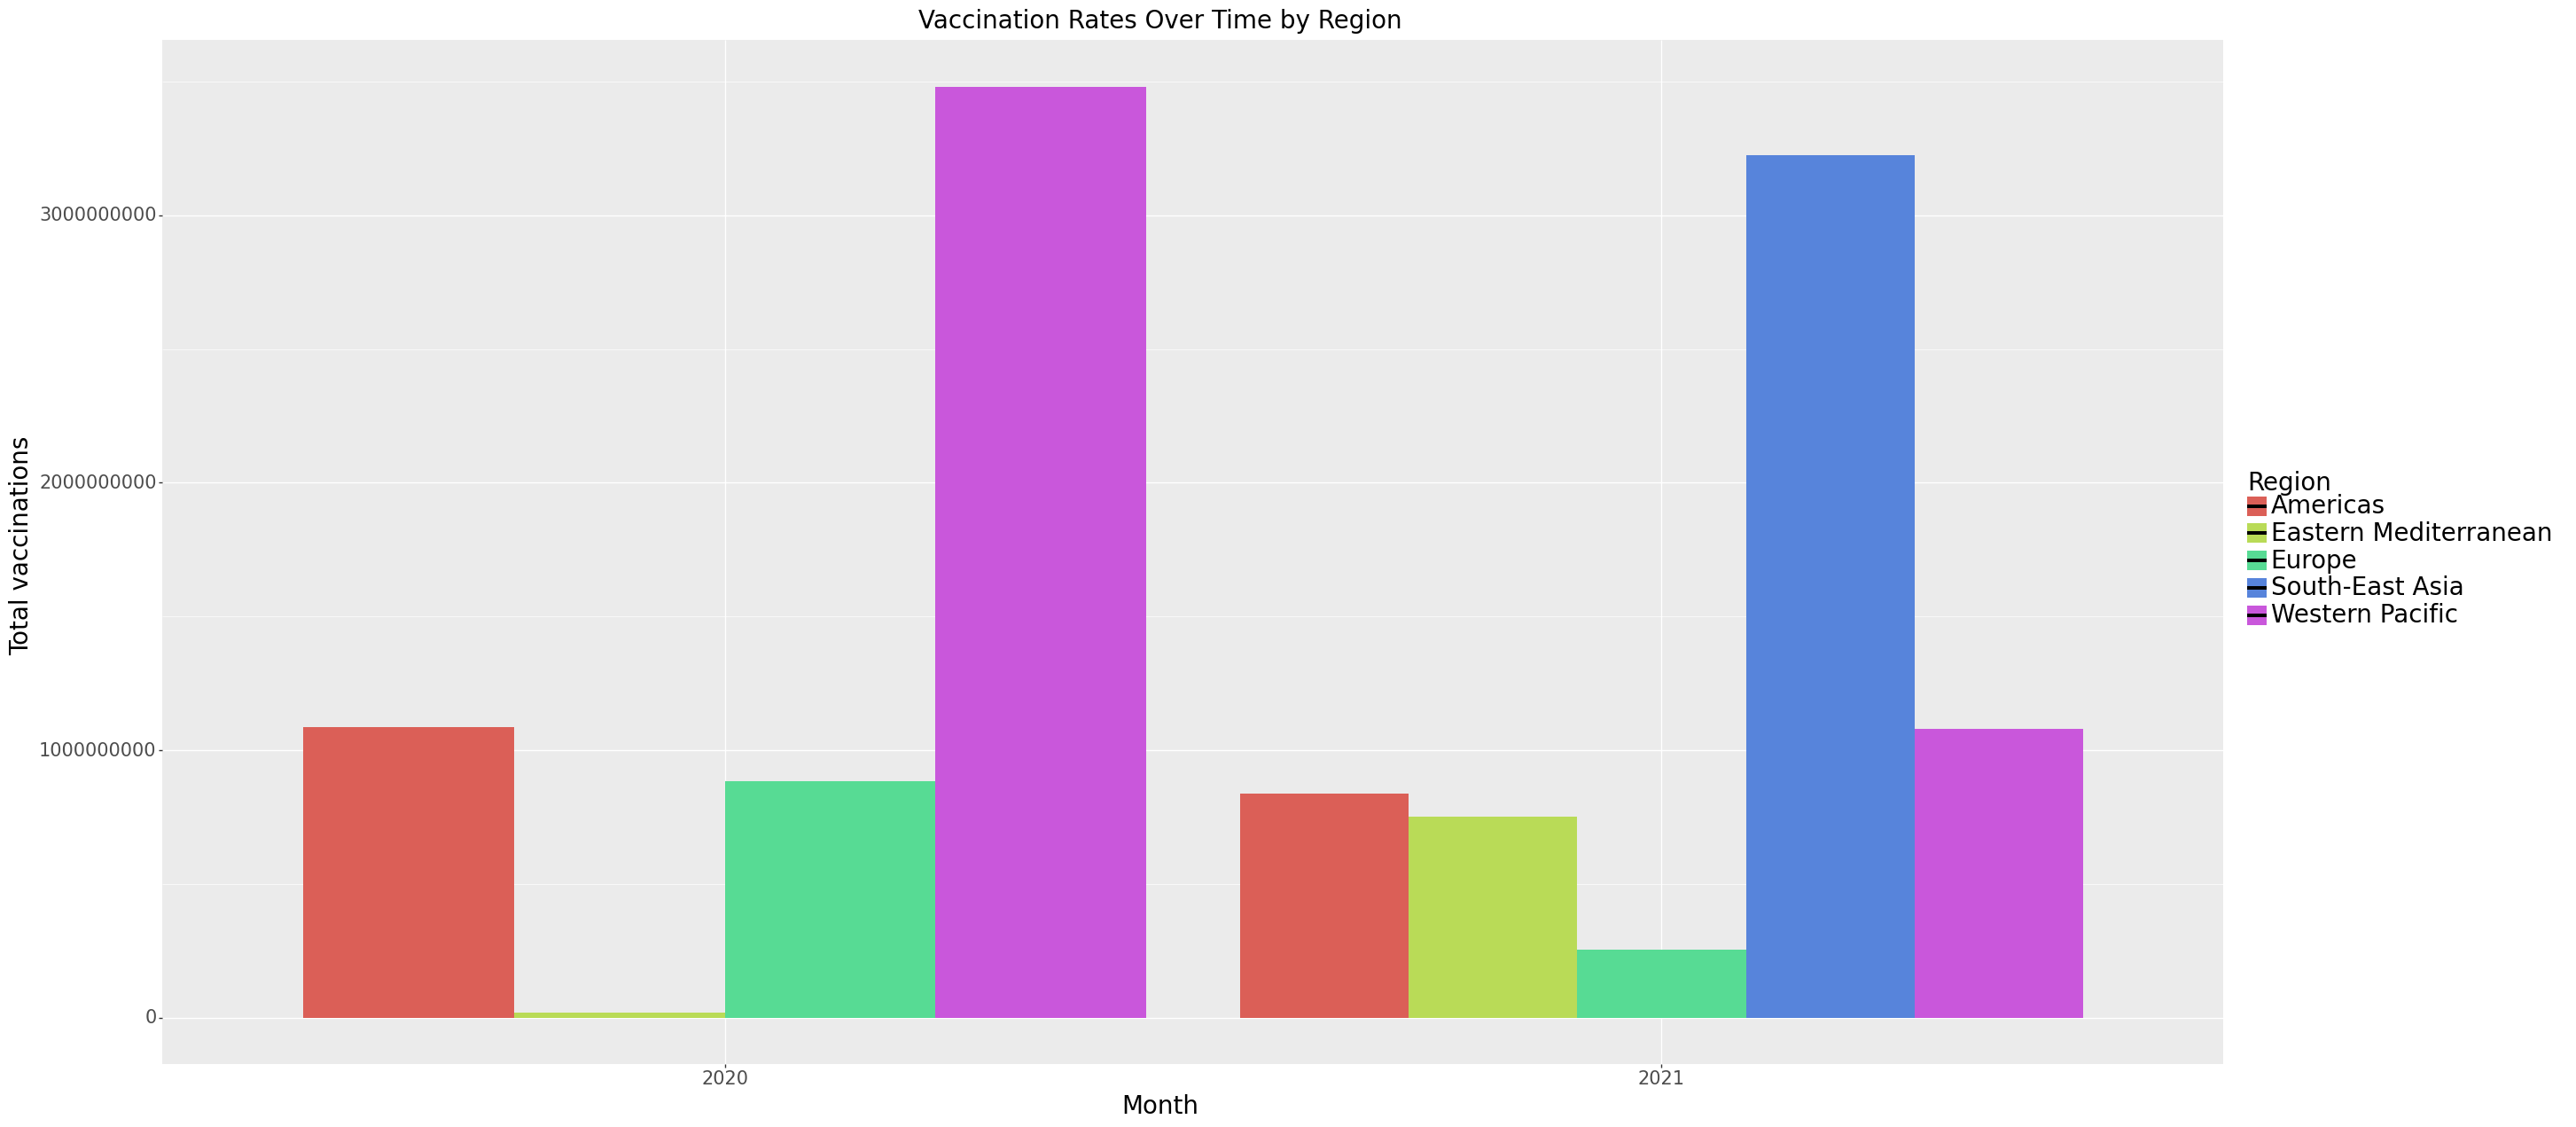

In [ ]:
from plotnine import *

class VaccinationData:
    def __init__(self, df):
        self.df = df
    
    def plot_vaccination_rates(self):
        regions = self.df['WHO Region'].unique()
        monthly_vaccinations = []
        for region in regions:
            region_df = self.df[self.df['WHO Region'] == region].copy()
            region_df['Month'] = pd.to_datetime(region_df['FIRST_VACCINE_DATE'], format='%d/%m/%Y').dt.to_period('Y')
            region_vaccinations = region_df.groupby('Month')['TOTAL_VACCINATIONS'].sum().reset_index()
            region_vaccinations['Region'] = region
            monthly_vaccinations.append(region_vaccinations)
        merged_df = pd.concat(monthly_vaccinations)
        
        # Use ggplot to create the bar plot with trendlines
        p = (ggplot(merged_df, aes(x='Month', y='TOTAL_VACCINATIONS', fill='Region'))
             + geom_col(position='dodge')
             + geom_smooth(method='loess', se=False, size=1.5, color='black')
             + theme(figure_size=(30, 15),
                     axis_title=element_text(size=20),
                     legend_title=element_text(size=20),
                     legend_text=element_text(size=20),
                     plot_title=element_text(size=20),
                     axis_text_x=element_text(size=15),
                     axis_text_y=element_text(size=15))
             + xlab('Month')
             + ylab('Total vaccinations')
             + ggtitle('Vaccination Rates Over Time by Region')
             + guides(fill=guide_legend(title='Region')))
        print(p)
        
if __name__ == '__main__':
    vd = VaccinationData(mdf)
    vd.plot_vaccination_rates()


# Question 10

**Question: How does the number of booster doses administered vary by region?**

In [ ]:
class BoosterDoseVisualizer:
    
    def __init__(self, df):
        self.df = df
    
    def plot_booster_doses_by_region(self):
        relevant_df = self.df[['WHO Region', 'PERSONS_BOOSTER_ADD_DOSE']].copy()
        relevant_df = relevant_df.dropna()
        relevant_df = relevant_df[relevant_df['PERSONS_BOOSTER_ADD_DOSE'] > 5000000] # Filter out countries with less than 5000000 booster doses
        relevant_df = relevant_df.sort_values(by='PERSONS_BOOSTER_ADD_DOSE', ascending=False)
        
        # Create bar plot
        colors = px.colors.qualitative.Plotly
        fig = px.bar(relevant_df, x='WHO Region', y='PERSONS_BOOSTER_ADD_DOSE',
                     color='WHO Region', color_discrete_sequence=colors)
        fig.update_layout(title='Number of booster doses administered by WHO region',
                          xaxis_title='WHO Region', yaxis_title='Number of booster doses administered')
        fig.update_traces(marker_line_width=0)
        fig.show()

if __name__ == '__main__':
    bdv = BoosterDoseVisualizer(mdf)
    bdv.plot_booster_doses_by_region()


In [ ]:
import plotly.express as px

class BoosterDoseVisualizer:
    
    def __init__(self, df):
        self.df = df
    
    def plot_booster_doses_by_region(self):
        relevant_df = self.df[['WHO Region', 'PERSONS_BOOSTER_ADD_DOSE']].copy()
        relevant_df = relevant_df.dropna()
        relevant_df = relevant_df[relevant_df['PERSONS_BOOSTER_ADD_DOSE'] > 5000000] # Filter out countries with less than 5000000 booster doses
        relevant_df = relevant_df.sort_values(by='PERSONS_BOOSTER_ADD_DOSE', ascending=False)
        
        # Create donut chart
        colors = px.colors.sequential.Brwnyl
        fig = px.pie(relevant_df, values='PERSONS_BOOSTER_ADD_DOSE', names='WHO Region',
                     color='WHO Region', color_discrete_sequence=colors, hole=.35)
        fig.update_layout(title='Number of booster doses administered by WHO region',
                          xaxis_title=None, yaxis_title=None)
        fig.update_traces(textposition='inside', textinfo='percent+label', marker_line_color='white')
        fig.show()

if __name__ == '__main__':
    bdv = BoosterDoseVisualizer(mdf)
    bdv.plot_booster_doses_by_region()